In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal

In [2]:
def read(file):
    fs, x = scipy.io.wavfile.read(file)
    y = scipy.signal.hilbert(x)
    return fs, y
    
def spectrum_plot(x, fs, a, b, c = 0):
    f, t, Sxx = scipy.signal.spectrogram(x, fs, nfft = 2**12, return_onesided=False)
    f = np.fft.fftshift(f)
    fsel = slice(f.size//2 + 50, f.size//2 + 300)
    f = f[fsel]
    plt.imshow(np.fft.fftshift(np.log10(Sxx), axes=0)[fsel,:][::-1,:], extent = [t[0],t[-1],f[0],f[-1]], aspect='auto', cmap='viridis')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.plot(t, c * t**2 + a * t + b, color = 'red')
    
def correct(out, x, fs, a, b, c = 0):
    freq = c * (np.arange(x.size) / fs)**2 + a * np.arange(x.size) / fs + b
    phase = np.cumsum(freq)/fs
    z = x * np.exp(-1j*2*np.pi*(phase - 1500 * np.arange(x.size)/fs))
    scipy.io.wavfile.write(out, int(fs), np.round(z.real).astype('int16'))

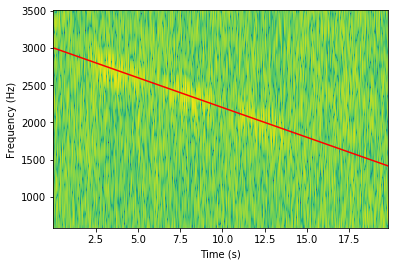

In [3]:
fs, x = read('/home/daniel/Descargas/2019-12-06-1124Z_fossasat-1.wav')
a = -80
b = 3000
spectrum_plot(x, fs, a, b)
correct('/tmp/fossa.wav', x, fs, a, b)

/home/daniel/.local/lib64/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


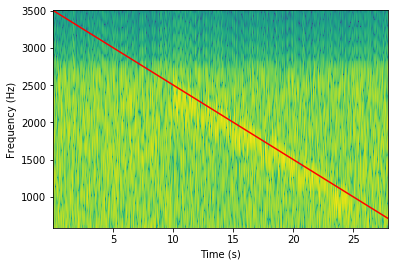

In [4]:
fs, x = read('/tmp/fossa_eb2at.wav')
a = -100
b = 3500
c = 0
spectrum_plot(x, fs, a, b, c)
correct('/tmp/fossa2.wav', x, fs, a, b, c)